In [6]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset

from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.cluster import KMeans

import ast

from gensim.models import Word2Vec

In [7]:
df = pd.read_csv("final.csv")

In [8]:

df['tweet_tokens'] = df['tweet_tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# TF IDF

In [14]:
# TF IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['tweet_new'])  
y = df['BinaryNumTarget'].astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),  
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')




    results[name] = (acc, prec, rec, macro_f1, weighted_f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Macro={macro_f1:.4f}, F1 Weighted={weighted_f1:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))

Random Forest: Accuracy=0.9801, Precision=0.9824, Recall=0.9788, F1 Macro=0.9801, F1 Weighted=0.9801
Klasa 0: 0.98
Klasa 1: 0.981
Decision Tree: Accuracy=0.9697, Precision=0.9694, Recall=0.9716, F1 Macro=0.9696, F1 Weighted=0.9697
Klasa 0: 0.969
Klasa 1: 0.97
Naive Bayes: Accuracy=0.9463, Precision=0.9383, Recall=0.9585, F1 Macro=0.9463, F1 Weighted=0.9463
Klasa 0: 0.944
Klasa 1: 0.948
KNN: Accuracy=0.7340, Precision=0.6588, Recall=0.9996, F1 Macro=0.7092, F1 Weighted=0.7115
Klasa 0: 0.624
Klasa 1: 0.794
SVM: Accuracy=0.9781, Precision=0.9764, Recall=0.9811, F1 Macro=0.9781, F1 Weighted=0.9781
Klasa 0: 0.977
Klasa 1: 0.979


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [11:50:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9651, Precision=0.9528, Recall=0.9807, F1 Macro=0.9651, F1 Weighted=0.9651
Klasa 0: 0.964
Klasa 1: 0.967
Logistic Regression: Accuracy=0.9745, Precision=0.9717, Recall=0.9788, F1 Macro=0.9745, F1 Weighted=0.9745
Klasa 0: 0.974
Klasa 1: 0.975


In [11]:

param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan'],

}
knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNN: {grid_search.best_params_}")


best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"KNN: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3}
KNN: Accuracy=0.7550, Precision=0.6771, Recall=0.9993, F1=0.8072


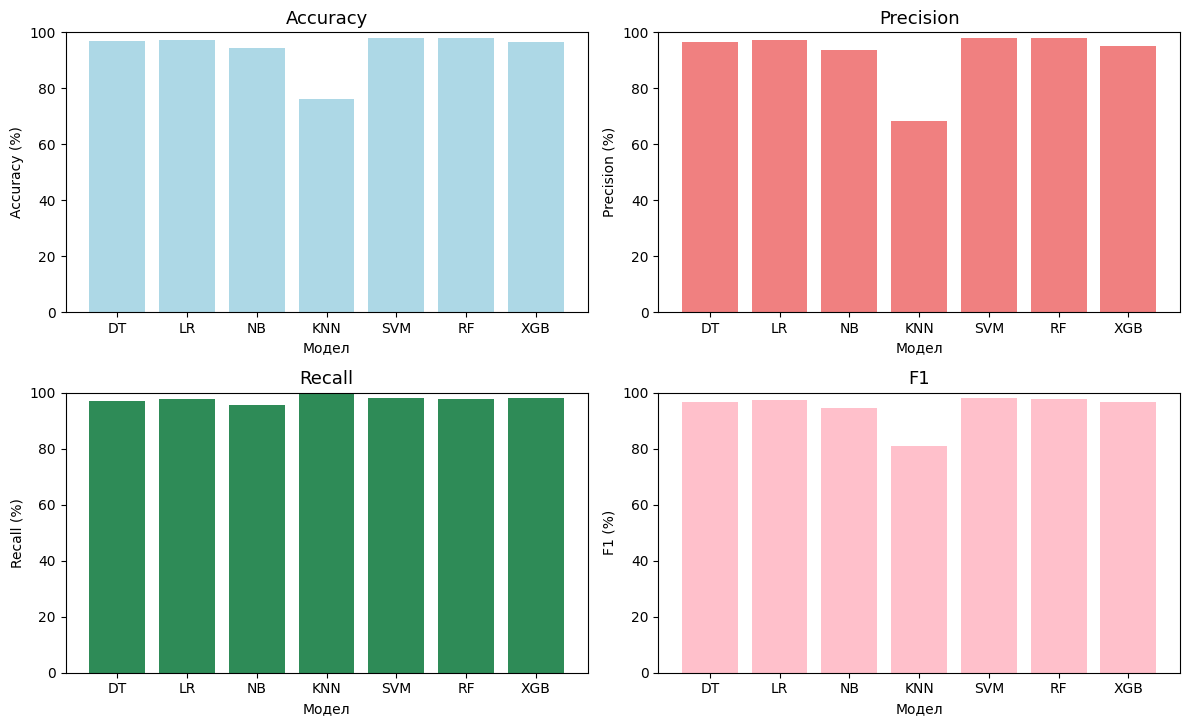

In [ ]:
import matplotlib.pyplot as plt

results = {
    "DT":     [0.9674, 0.9665, 0.9701, 0.9683],
    "LR": [0.9738, 0.9724, 0.9766, 0.9745],
    "NB":     [0.9445, 0.9377, 0.9552, 0.9464],
    "KNN":    [0.7609, 0.6822, 0.9991, 0.8108],
    "SVM":    [0.9798, 0.9795, 0.9813, 0.9804],
    "RF":     [0.9780, 0.9788, 0.9783, 0.9786],
    "XGB":    [0.9645, 0.9520, 0.9802, 0.9659]
}

metrics = ["Accuracy", "Precision", "Recall", "F1"]
colors = ['lightblue', 'lightcoral', 'seagreen', 'pink']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    values = [results[model][i] * 100 for model in results]
    ax.bar(results.keys(), values, color=colors[i])
    ax.set_ylim([0, 100])
    ax.set_ylabel(f"{metrics[i]} (%)")
    ax.set_xlabel("Модел")
    ax.set_title(f"{metrics[i]}", fontsize=13)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Word2Vec

In [15]:


sentences = df['tweet_tokens'].tolist()

w2v_model = Word2Vec(sentences, vector_size=300, window=10, min_count=5, workers=4,sg=1, negative=10)

def vectorize_tweet(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(w2v_model.vector_size)
    else:
        return np.mean(vectors, axis=0)

X = np.array([vectorize_tweet(tokens) for tokens in df['tweet_tokens']])
y = df['BinaryNumTarget'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')




    results[name] = (acc, prec, rec, macro_f1, weighted_f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Macro={macro_f1:.4f}, F1 Weighted={weighted_f1:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))


Random Forest: Accuracy=0.9587, Precision=0.9526, Recall=0.9676, F1 Macro=0.9586, F1 Weighted=0.9587
Klasa 0: 0.957
Klasa 1: 0.96
Decision Tree: Accuracy=0.8512, Precision=0.8538, Recall=0.8569, F1 Macro=0.8511, F1 Weighted=0.8512
Klasa 0: 0.847
Klasa 1: 0.855
KNN: Accuracy=0.9876, Precision=0.9881, Recall=0.9877, F1 Macro=0.9876, F1 Weighted=0.9876
Klasa 0: 0.987
Klasa 1: 0.988
SVM: Accuracy=0.9151, Precision=0.9133, Recall=0.9222, F1 Macro=0.9150, F1 Weighted=0.9151
Klasa 0: 0.912
Klasa 1: 0.918


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:28:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9683, Precision=0.9664, Recall=0.9721, F1 Macro=0.9683, F1 Weighted=0.9683
Klasa 0: 0.967
Klasa 1: 0.969
Logistic Regression: Accuracy=0.9145, Precision=0.9129, Recall=0.9213, F1 Macro=0.9144, F1 Weighted=0.9145
Klasa 0: 0.912
Klasa 1: 0.917
Naive Bayes: Accuracy=0.7933, Precision=0.8078, Recall=0.7839, F1 Macro=0.7933, F1 Weighted=0.7934
Klasa 0: 0.791
Klasa 1: 0.796


# Fast Text

In [16]:
from gensim.models import FastText

sentences = df['tweet_tokens'].tolist()

model = FastText(sentences, vector_size=100, window=5, min_count=1, sg=1)

model.save('fasttext_model.model')

def get_vector(tokens, model):
    
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:  
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

X = np.array([get_vector(tokens, model) for tokens in df['tweet_tokens']])

y = df['BinaryNumTarget'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
    weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')


    results[name] = (acc, prec, rec, macro_f1, weighted_f1)
    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Macro={macro_f1:.4f}, F1 Weighted={weighted_f1:.4f}")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    print("Klasa 0:", round(df_report.loc['0', 'f1-score'], 3))
    print("Klasa 1:", round(df_report.loc['1', 'f1-score'], 3))


Decision Tree: Accuracy=0.8344, Precision=0.8384, Recall=0.8390, F1 Macro=0.8343, F1 Weighted=0.8344
Klasa 0: 0.83
Klasa 1: 0.839
Random Forest: Accuracy=0.9411, Precision=0.9388, Recall=0.9469, F1 Macro=0.9410, F1 Weighted=0.9410
Klasa 0: 0.939
Klasa 1: 0.943
KNN: Accuracy=0.9776, Precision=0.9787, Recall=0.9776, F1 Macro=0.9776, F1 Weighted=0.9776
Klasa 0: 0.977
Klasa 1: 0.978
SVM: Accuracy=0.7954, Precision=0.7845, Recall=0.8293, F1 Macro=0.7948, F1 Weighted=0.7951
Klasa 0: 0.783
Klasa 1: 0.806


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [12:52:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Accuracy=0.9428, Precision=0.9403, Recall=0.9488, F1 Macro=0.9428, F1 Weighted=0.9428
Klasa 0: 0.941
Klasa 1: 0.945
Logistic Regression: Accuracy=0.7906, Precision=0.7833, Recall=0.8186, F1 Macro=0.7901, F1 Weighted=0.7904
Klasa 0: 0.78
Klasa 1: 0.801
Naive Bayes: Accuracy=0.7600, Precision=0.7697, Recall=0.7598, F1 Macro=0.7599, F1 Weighted=0.7600
Klasa 0: 0.755
Klasa 1: 0.765


# Word cloud

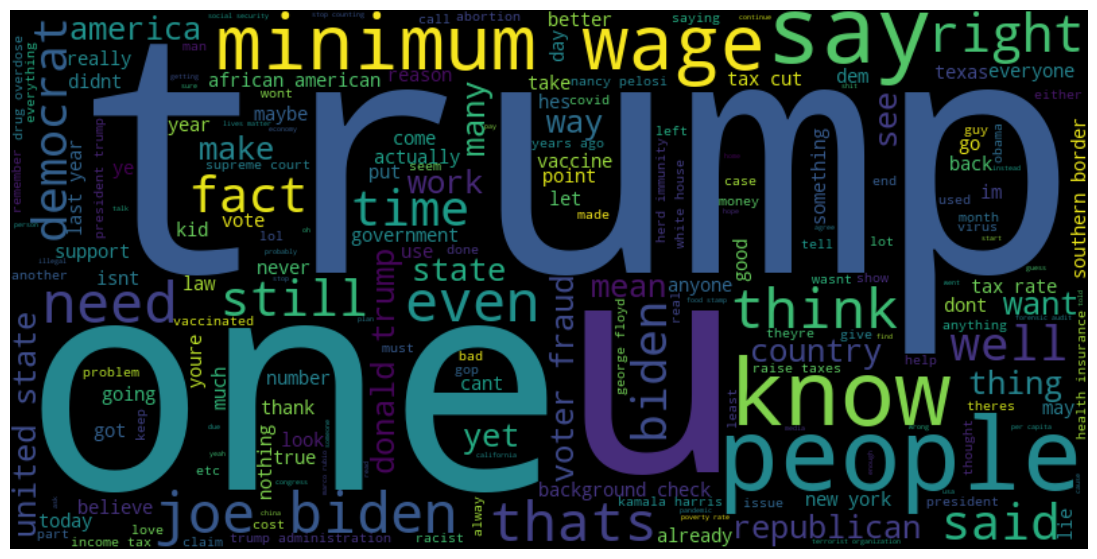

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['tweet_new'].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


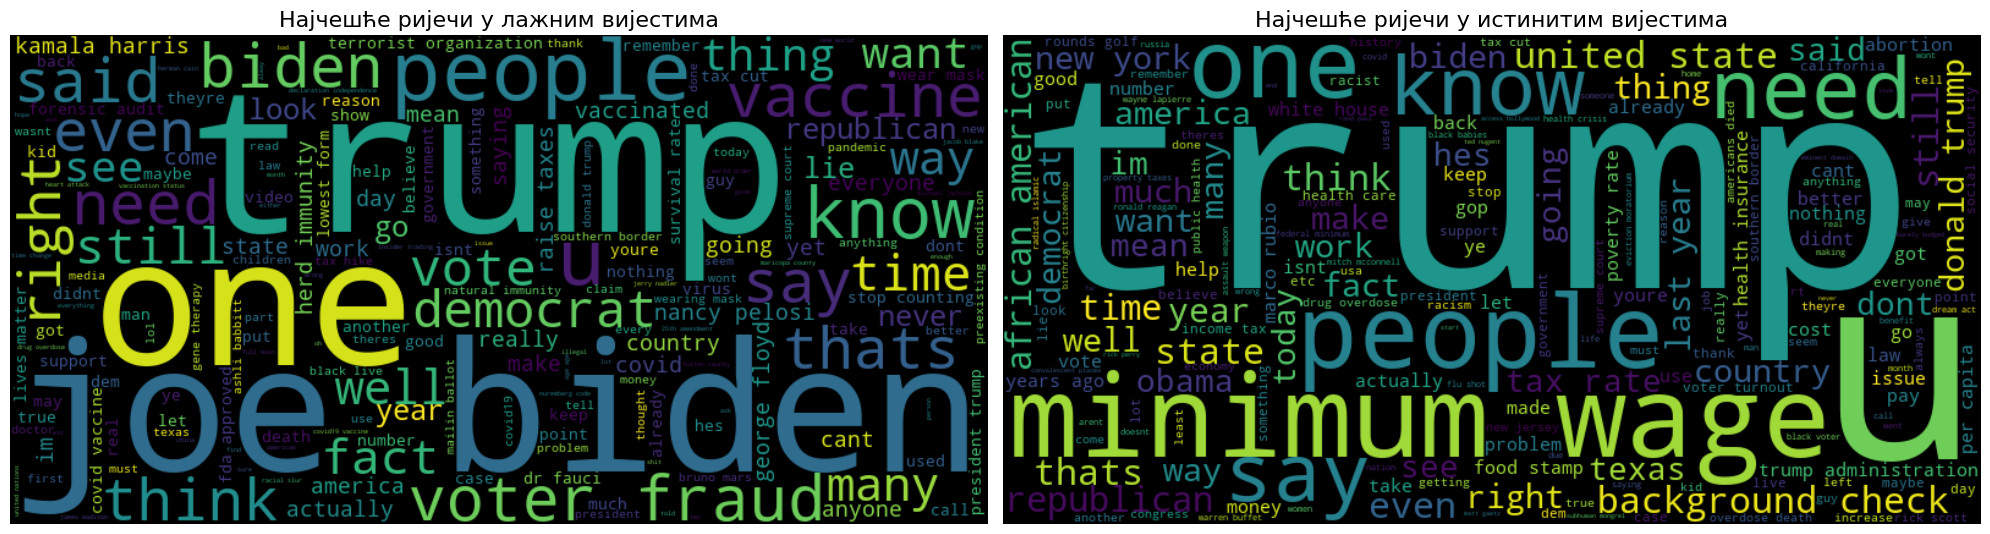

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud za lažne vijesti
df_false = df[df['BinaryNumTarget'] == 0.0]
text_false = ' '.join(df_false['tweet_new'].astype(str).tolist())
wordcloud_false = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_false)

# WordCloud za istinite vijesti
df_true = df[df['BinaryNumTarget'] == 1.0]
text_true = ' '.join(df_true['tweet_new'].astype(str).tolist())
wordcloud_true = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_true)

# Prikaz oba u istom redu
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Prikaz lažnih vijesti
axes[0].imshow(wordcloud_false, interpolation='bilinear')
axes[0].set_title('Најчешће ријечи у лажним вијестима', fontsize=16)
axes[0].axis('off')

# Prikaz istinitih vijesti
axes[1].imshow(wordcloud_true, interpolation='bilinear')
axes[1].set_title('Најчешће ријечи у истинитим вијестима', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()
